In [60]:
import pandas as pd
import numpy as np
import scipy.sparse
import matplotlib.pyplot as plt
# Maybe Useful
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.pipeline import Pipeline, FeatureUnion
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.cluster import AffinityPropagation

In [61]:
# Loading datasets
title_tf_idf = scipy.sparse.load_npz('Dataset/title_tf_idf.npz')
movielens_filtered = pd.read_csv('Dataset/movielens_preprocessed.csv')
movies = pd.read_csv('Dataset/movies.csv')
movielens_filtered.head()

,user_id,movie_id,rating,genre_unknown,Action,Adventure,Animation,Children,Comedy,Crime,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,195,241,3.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,195,256,2.0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,195,110,4.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,195,24,4.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,195,381,4.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [64]:
cluster = KMeans(n_clusters=20)
group_pred = cluster.fit_predict(movielens_filtered)
print(group_pred);



#clusterAf = AffinityPropagation().fit_predict(movielens_filtered)

[19 19  0 ... 13 13 13]


In [67]:
clusterSC = SpectralClustering(n_clusters=20,assign_labels="kmeans")
pred_basic = clusterSC.fit_predict(movielens_filtered)

print(pred_basic)

MemoryError: Unable to allocate 74.5 GiB for an array with shape (100000, 100000) and data type float64

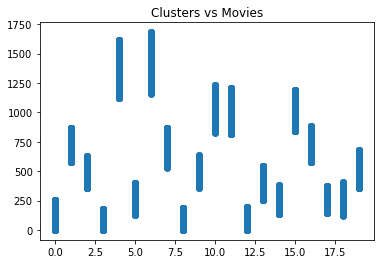

In [54]:
plt.title("Clusters vs Movies")
plt.scatter(group_pred,movies['movie_id'])

data_wtout_user = movielens_filtered.drop(columns = ['user_id'])
#print(group_pred)
#print(movies['user_id'])

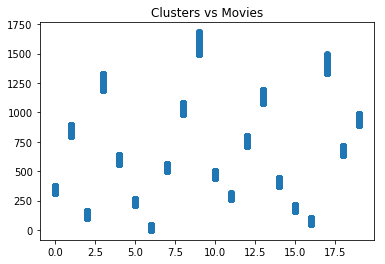

In [56]:
cluster_01 = KMeans(n_clusters=20)
group_pred1 = cluster_01.fit_predict(data_wtout_user)

plt.title("Clusters vs Movies")
plt.scatter(group_pred1,movies['movie_id'])

data = movielens_filtered.drop(columns = ['movie_id'])
#print(group_pred)
#print(group_pred);

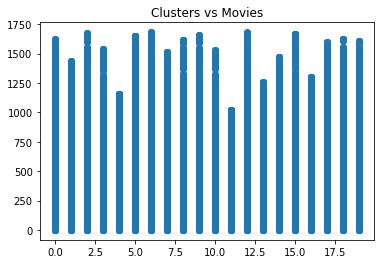

In [58]:
cluster_02 = KMeans(n_clusters=20)
group_pred2 = cluster_02.fit_predict(data)

plt.title("Clusters vs Movies")
plt.scatter(group_pred2,movies['movie_id'])

#data = movielens_filtered.drop(column = ['movie_id'])

In [68]:
# Perform t-SNE to reduce the dimensionality down to 2 dimenions, for easier plotting.
tsne = TSNE(n_components=2)
tsne_fit = tsne.fit_transform(movielens_filtered)